Análisis Estadístico Descriptivo (EDA)
1. Resumen Estadístico
Proporcionaremos medidas de tendencia central y dispersión para todas las variables relevantes en los DataFrames.
2. Visualización
Crearemos histogramas, gráficos de caja y gráficos de dispersión para identificar patrones y distribuciones.
3. Identificación de Valores Atípicos
Detectaremos valores atípicos mediante métricas estadísticas y visualizaciones, como gráficos de caja.

In [2]:
# Manipulación y Análisis de Datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización Geográfica
import folium

# Estadísticas y Cálculos Adicionales
from scipy.stats import zscore

In [3]:
# Cargar los DataFrames
df_location = pd.read_excel('../dataset/df_location.xlsx')
df_orders = pd.read_excel('../dataset/df_orders.xlsx')
df_vehicle = pd.read_excel('../dataset/df_vehicle.xlsx')
df_distance_km = pd.read_excel('../dataset/df_distance_km.xlsx')

In [4]:
# 1. Resumen Estadístico

# Resumen Estadístico para todos los DataFrames
def summarize_dataframes(df_list, names):
    for df, name in zip(df_list, names):
        print(f"Resumen Estadístico de {name}:")
        print(df.describe())
        print("\n")

# Lista de DataFrames y sus nombres
dataframes = [df_location, df_vehicle, df_orders, df_distance_km]
names = ["Ubicaciones (df_location)", "Vehículos (df_vehicle)", "Pedidos (df_orders)", "Distancias (df_distance_km)"]

# Resumen Estadístico
summarize_dataframes(dataframes, names)


Resumen Estadístico de Ubicaciones (df_location):
         Latitud   Longitud
count  21.000000  21.000000
mean   40.419163  -3.693152
std     0.040199   0.045856
min    40.334024  -3.814595
25%    40.389637  -3.708079
50%    40.409083  -3.700350
75%    40.446872  -3.677859
max    40.512445  -3.586515


Resumen Estadístico de Vehículos (df_vehicle):
       vehiculo_id  capacidad_kg  costo_km  autonomia_km
count     6.000000      6.000000  6.000000      6.000000
mean      3.500000   4619.833333  0.198333    592.000000
std       1.870829   2818.453577  0.065853    148.995302
min       1.000000   2026.000000  0.140000    350.000000
25%       2.250000   3177.000000  0.152500    536.250000
50%       3.500000   3841.500000  0.195000    616.500000
75%       4.750000   4751.250000  0.200000    655.500000
max       6.000000  10000.000000  0.320000    791.000000


Resumen Estadístico de Pedidos (df_orders):
       order_demand
count     20.000000
mean     936.900000
std       32.736427
min      8

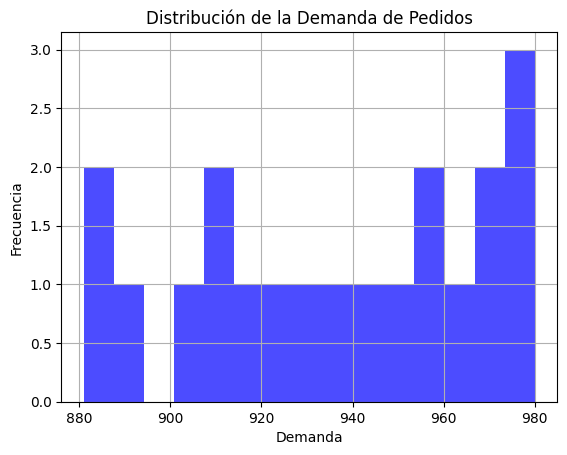

In [5]:
# 2. Visualización
# (a) Histogramas

# Histograma de órdenes
plt.hist(df_orders['order_demand'], bins=15, color='blue', alpha=0.7)
plt.title("Distribución de la Demanda de Pedidos")
plt.xlabel("Demanda")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()


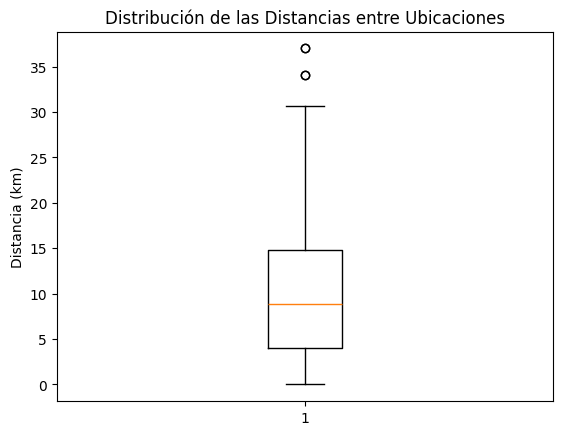

In [8]:
# (b) Gráficos de Caja

# Gráfico de Caja para las distancias entre ubicaciones
plt.boxplot(df_distance_km.iloc[:, 1:].values.flatten())
plt.title("Distribución de las Distancias entre Ubicaciones")
plt.ylabel("Distancia (km)")
plt.show()


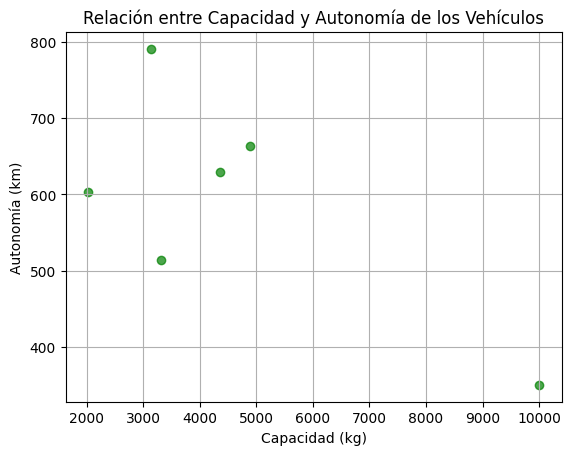

In [7]:
# (c) Gráficos de Dispersión

# Gráfico de Dispersión: Capacidad vs Autonomía de los Vehículos
plt.scatter(df_vehicle['capacidad_kg'], df_vehicle['autonomia_km'], c='green', alpha=0.7)
plt.title("Relación entre Capacidad y Autonomía de los Vehículos")
plt.xlabel("Capacidad (kg)")
plt.ylabel("Autonomía (km)")
plt.grid(True)
plt.show()



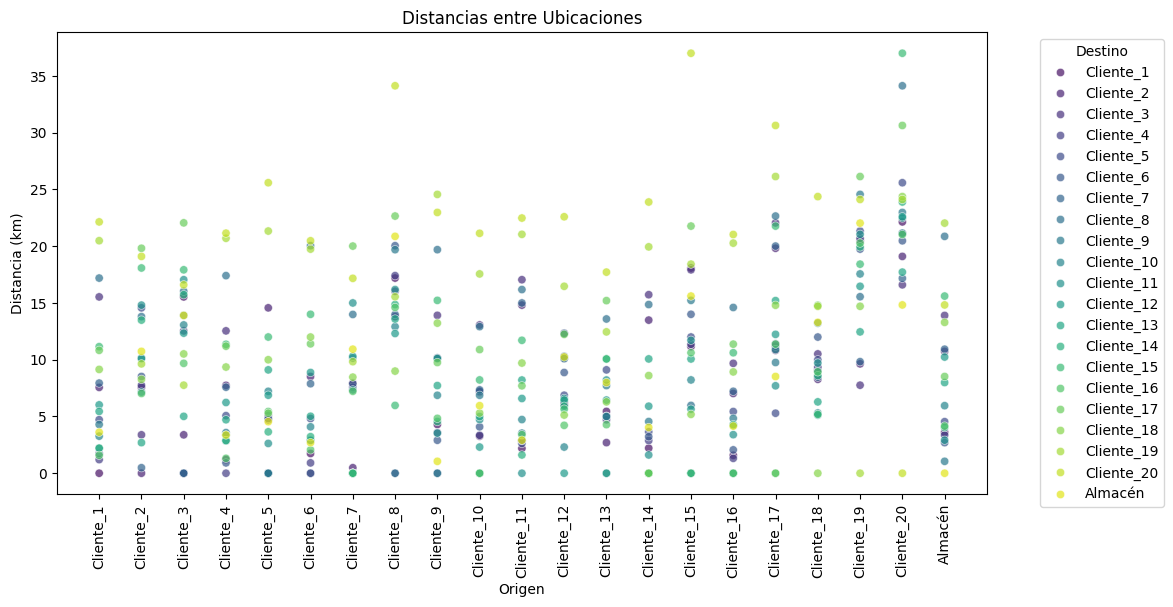

In [11]:
# Gráfico de dispersión para pares de distancias
distances_flat = df_distance_km.set_index('CLIENTES').stack().reset_index()
distances_flat.columns = ['Origen', 'Destino', 'Distancia']

plt.figure(figsize=(12, 6))
sns.scatterplot(data=distances_flat, x='Origen', y='Distancia', hue='Destino', palette='viridis', alpha=0.7)
plt.title("Distancias entre Ubicaciones")
plt.xlabel("Origen")
plt.ylabel("Distancia (km)")
plt.xticks(rotation=90)
plt.legend(title="Destino", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



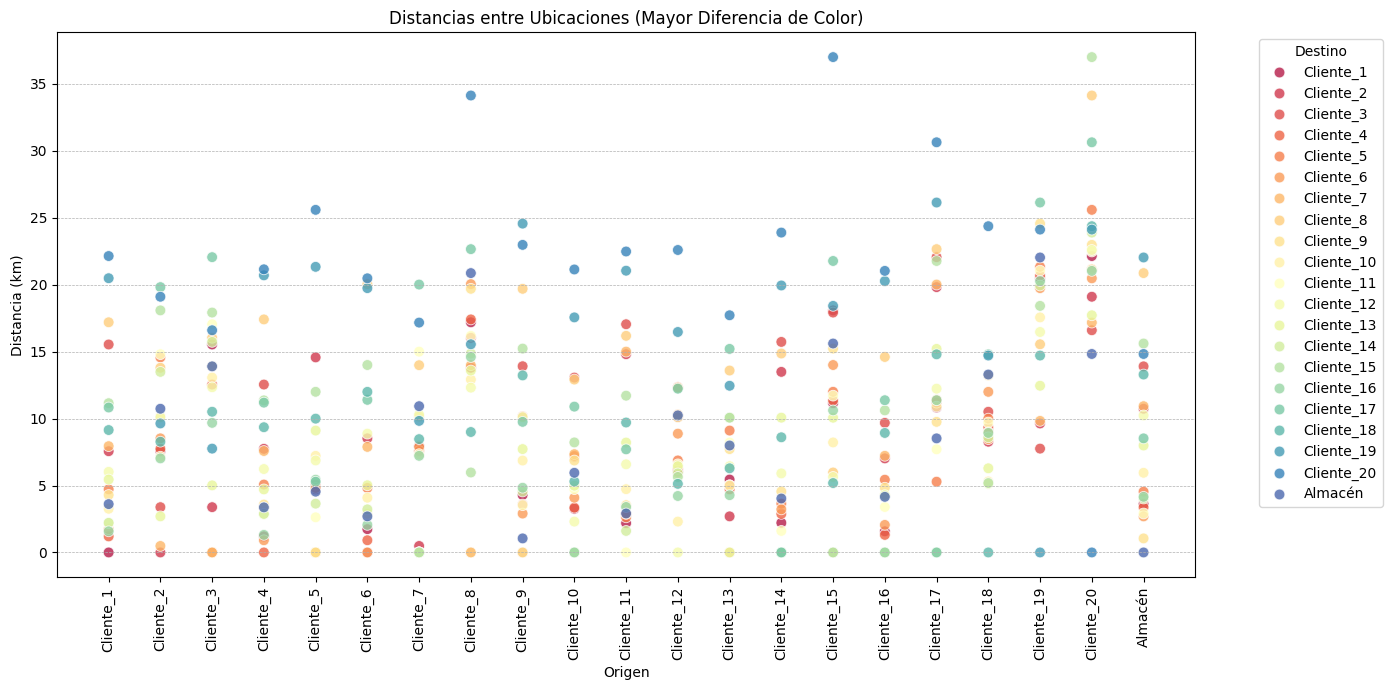

In [18]:
# Gráfico de dispersión para pares de distancias con una gama de colores destacada
distances_flat = df_distance_km.set_index('CLIENTES').stack().reset_index()
distances_flat.columns = ['Origen', 'Destino', 'Distancia']

plt.figure(figsize=(14, 7))
sns.scatterplot(
    data=distances_flat, 
    x='Origen', 
    y='Distancia', 
    hue='Destino', 
    palette='Spectral',  # Cambiamos la paleta de colores
    alpha=0.8,
    edgecolor='w', 
    s=60  # Tamaño de los puntos
)
plt.title("Distancias entre Ubicaciones (Mayor Diferencia de Color)")
plt.xlabel("Origen")
plt.ylabel("Distancia (km)")
plt.xticks(rotation=90)
plt.legend(title="Destino", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


3. Identificación de Valores Atípicos

In [19]:
# Identificación de Valores Atípicos en 'order_demand' usando IQR
Q1 = df_orders['order_demand'].quantile(0.25)
Q3 = df_orders['order_demand'].quantile(0.75)
IQR = Q3 - Q1

# Rango de valores aceptables
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar valores atípicos
outliers = df_orders[(df_orders['order_demand'] < lower_bound) | (df_orders['order_demand'] > upper_bound)]
print("Valores Atípicos en 'order_demand':")
print(outliers)


Valores Atípicos en 'order_demand':
Empty DataFrame
Columns: [cliente, mes_anio, order_demand]
Index: []
